# Task 1: Prediction using Supervised ML

### Description: We have a data with study hours, scores of 25 students. The end goal is to predict the percentage of marks a student gets based on the number of study hours.
Clearly, this is a simple linear regression type of problem as it involves just one independent variable & a dependent/ target variable.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns

# Loading the data

In [2]:
data=pd.read_csv("student_scores.csv")#load the data in a variable

In [3]:
data.head()#check first 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape #gives no. of rows&columns

(25, 2)

In [5]:
data.info() #dtypes: float64(HOURS), int64(SCORES)-NO NULL VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe() #Getting statistical details using describe() method

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Univariate Analysis

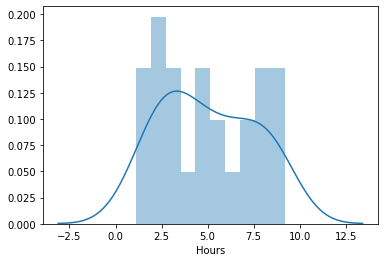

In [7]:
sns.distplot(data.Hours,bins=10)

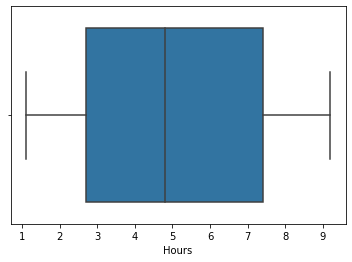

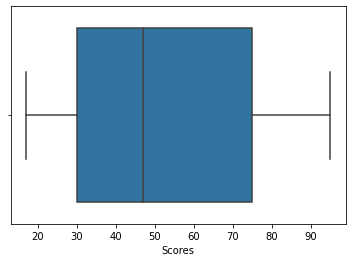

In [8]:
#Plotting boxplot for all columns
for col in data.columns:
    plt.figure()
    sns.boxplot(data[col])

*We have got no outliers, in the given data*

# Bivariate Analysis

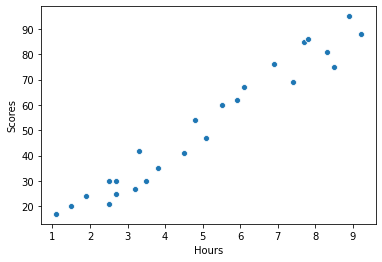

In [9]:
#Plotting SCORES Vs HOURS Studied
sns.scatterplot(data['Hours'],data['Scores'])

### We see a strong positive linear relationship between the variables in the 2D scatter plot.

In [10]:
data.corr()# High correlation:0.976 between hours & scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


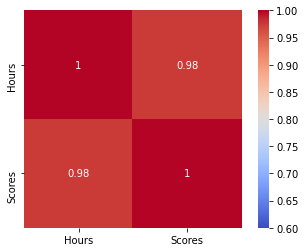

In [11]:
#Plotting a correlation heatmap
sns.heatmap(data.corr(),annot=True,square=True,cmap='coolwarm',vmin=0.6)

# Independent-Dependent Variable Split

In [12]:
x=data['Hours'].values #Independent Variable 
y=data['Scores'].values #Target/Dependent Variable`

In [13]:
x_reshaped=x.reshape(-1,1)

# Model Building

In [14]:
from sklearn.linear_model import LinearRegression
#Building the model
lr=LinearRegression()
lr.fit(x_reshaped,y)

LinearRegression()

In [15]:
#Predicting
y_pred=lr.predict(x_reshaped)
y_pred_train=lr.predict(x_reshaped)

# Plotting the model- best fit line

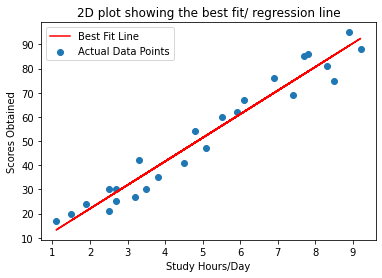

In [16]:
#Plotting the best fit line
plt.scatter(x,y,label='Actual Data Points')
plt.xlabel("Study Hours/Day")
plt.ylabel("Scores Obtained")
plt.title("2D plot showing the best fit/ regression line")
plt.plot(x,y_pred,color='red',label='Best Fit Line')
plt.legend()
plt.show()

# Evaluate Model Performance

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
#Let's get the actual & predicted score in a neat dataframe
pd.DataFrame({"Actual Score":y,"Predicted Score":y_pred})

,Actual Score,Predicted Score
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


In [19]:
#Calculating root mean squared error
print('Root Mean Squared Error:', mean_squared_error(y,y_pred)**0.5)
#Calculating r2_score
print('r2 Score:', r2_score(y,y_pred))

Root Mean Squared Error: 5.374265578592619
r2 Score: 0.9529481969048356


# Predicting the Target Variable

In [20]:
hours=9.5

In [21]:
score=lr.predict(np.array([[hours]]))

In [22]:
print(f"If a student studies {hours} hours/day, he will get {score[0].round(2)}%.")

If a student studies 9.5 hours/day, he will get 95.35%.


# *Summary: A simple linear regression model was build, r2_score = 0.953 and then, it was used to predict the target variable.*